In [1]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# STEP 2: LOAD THE DATASET
df = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
# STEP 3: CLEANING
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Convert 'Order Date'
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract Day, Month, Year
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%B')  # Full month name

In [4]:
# STEP 4: LABEL ENCODING FOR CATEGORICAL COLUMNS
label_cols = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

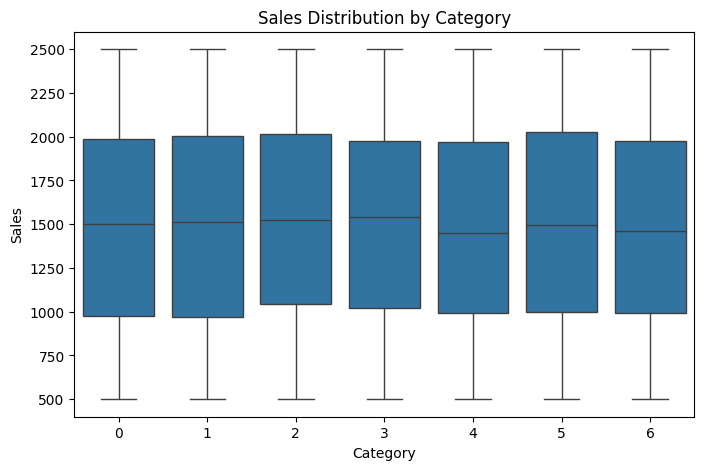

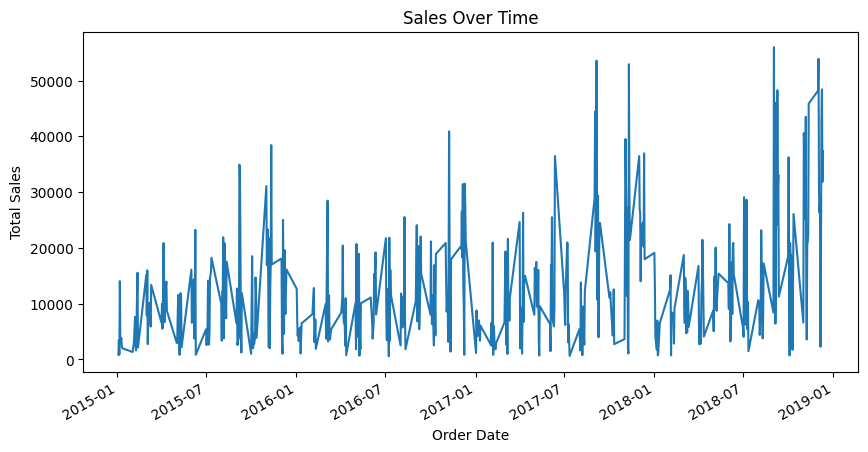

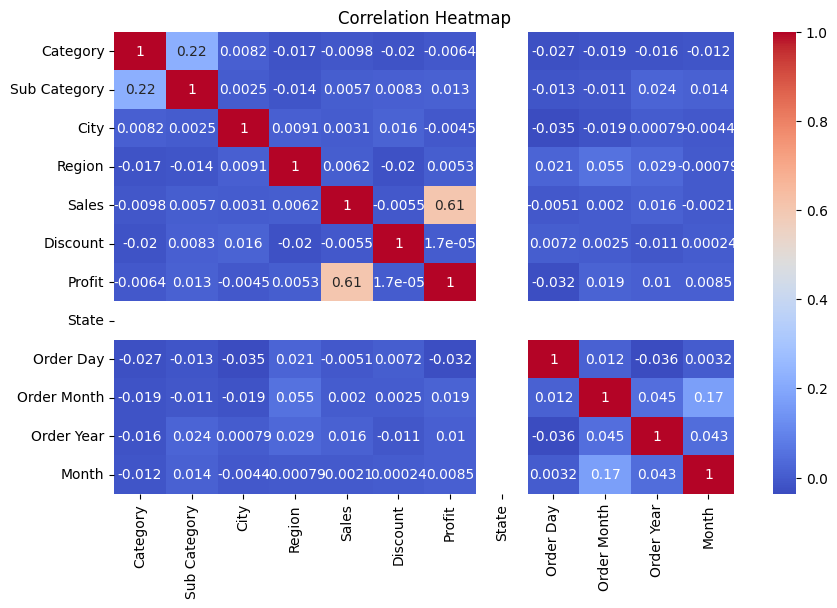

In [6]:
# STEP 5: EDA - OPTIONAL VISUALIZATIONS

# Sales by Category
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Sales Distribution by Category")
plt.show()

# Sales Over Time
plt.figure(figsize=(10,5))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Step 6: Drop non-useful columns
features = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Month'])
target = df['Sales']

In [13]:
# Concatenate features + target for synchronized dropna
data_cleaned = pd.concat([features, target], axis=1).dropna()

# Now separate again
features = data_cleaned.drop(columns=['Sales'])
target = data_cleaned['Sales']

In [14]:
#Step 7: Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Step 8: Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # ✅ This should now work

LinearRegression()

In [20]:
# STEP 9: EVALUATE MODEL
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 211380.02
R-squared Score: 0.37


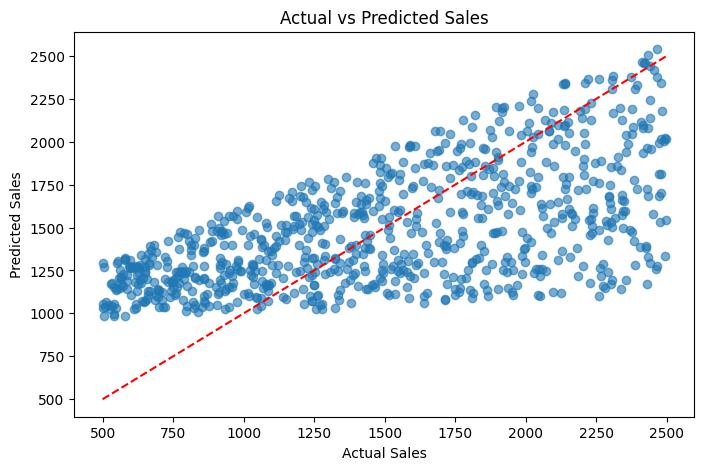

In [21]:
# STEP 10: VISUALIZE PREDICTIONS
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()